In [18]:
import pynq.lib.dma
from pynq import Xlnk
from pynq import Overlay
import sys
import time
from fobos_openadc_dev import *
# Program PL

#overlay = Overlay("./fobos_base_wrapper_orig.bit")
#overlay = Overlay("./fobosAcq_wrapper_dev.bit")
overlay = Overlay("../pynq_fobos/ctrl_top_wrapper_artix7.bit")

#overlay = Overlay("./fobosAcq.bit")
# Instantiate drivers and FobosAcquisition Class
#overlay?


In [19]:
dmaRecv = overlay.axi_dma_1
#dmaRecv = overlay.axi_dma_from_openadc_to_ps
openadcInterface = overlay.openadc_interface_v1_0_0
adcClk = overlay.clk_wiz_adc
fobosAcq = FobosAcquisition(openadcInterface, dmaRecv, adcClk)
fobosAcq.setAdcClockFreq(50)
adcClk.write(0x25c, 0x00000003)
openadcInterface.writeGain(20)

clkout a01
1 10 0
clkout 1000
divInt
20
divFrac
0.0
divInt
20
divFrac
0


DMA not started1

==== From FIFO to Memory ====
Stream to MM Control: 0x10003
             Binary : 0b10000000000000011
Stream to MM Status : 0x1002
             Binary : 0b1000000000010
Received full samples
PLOT


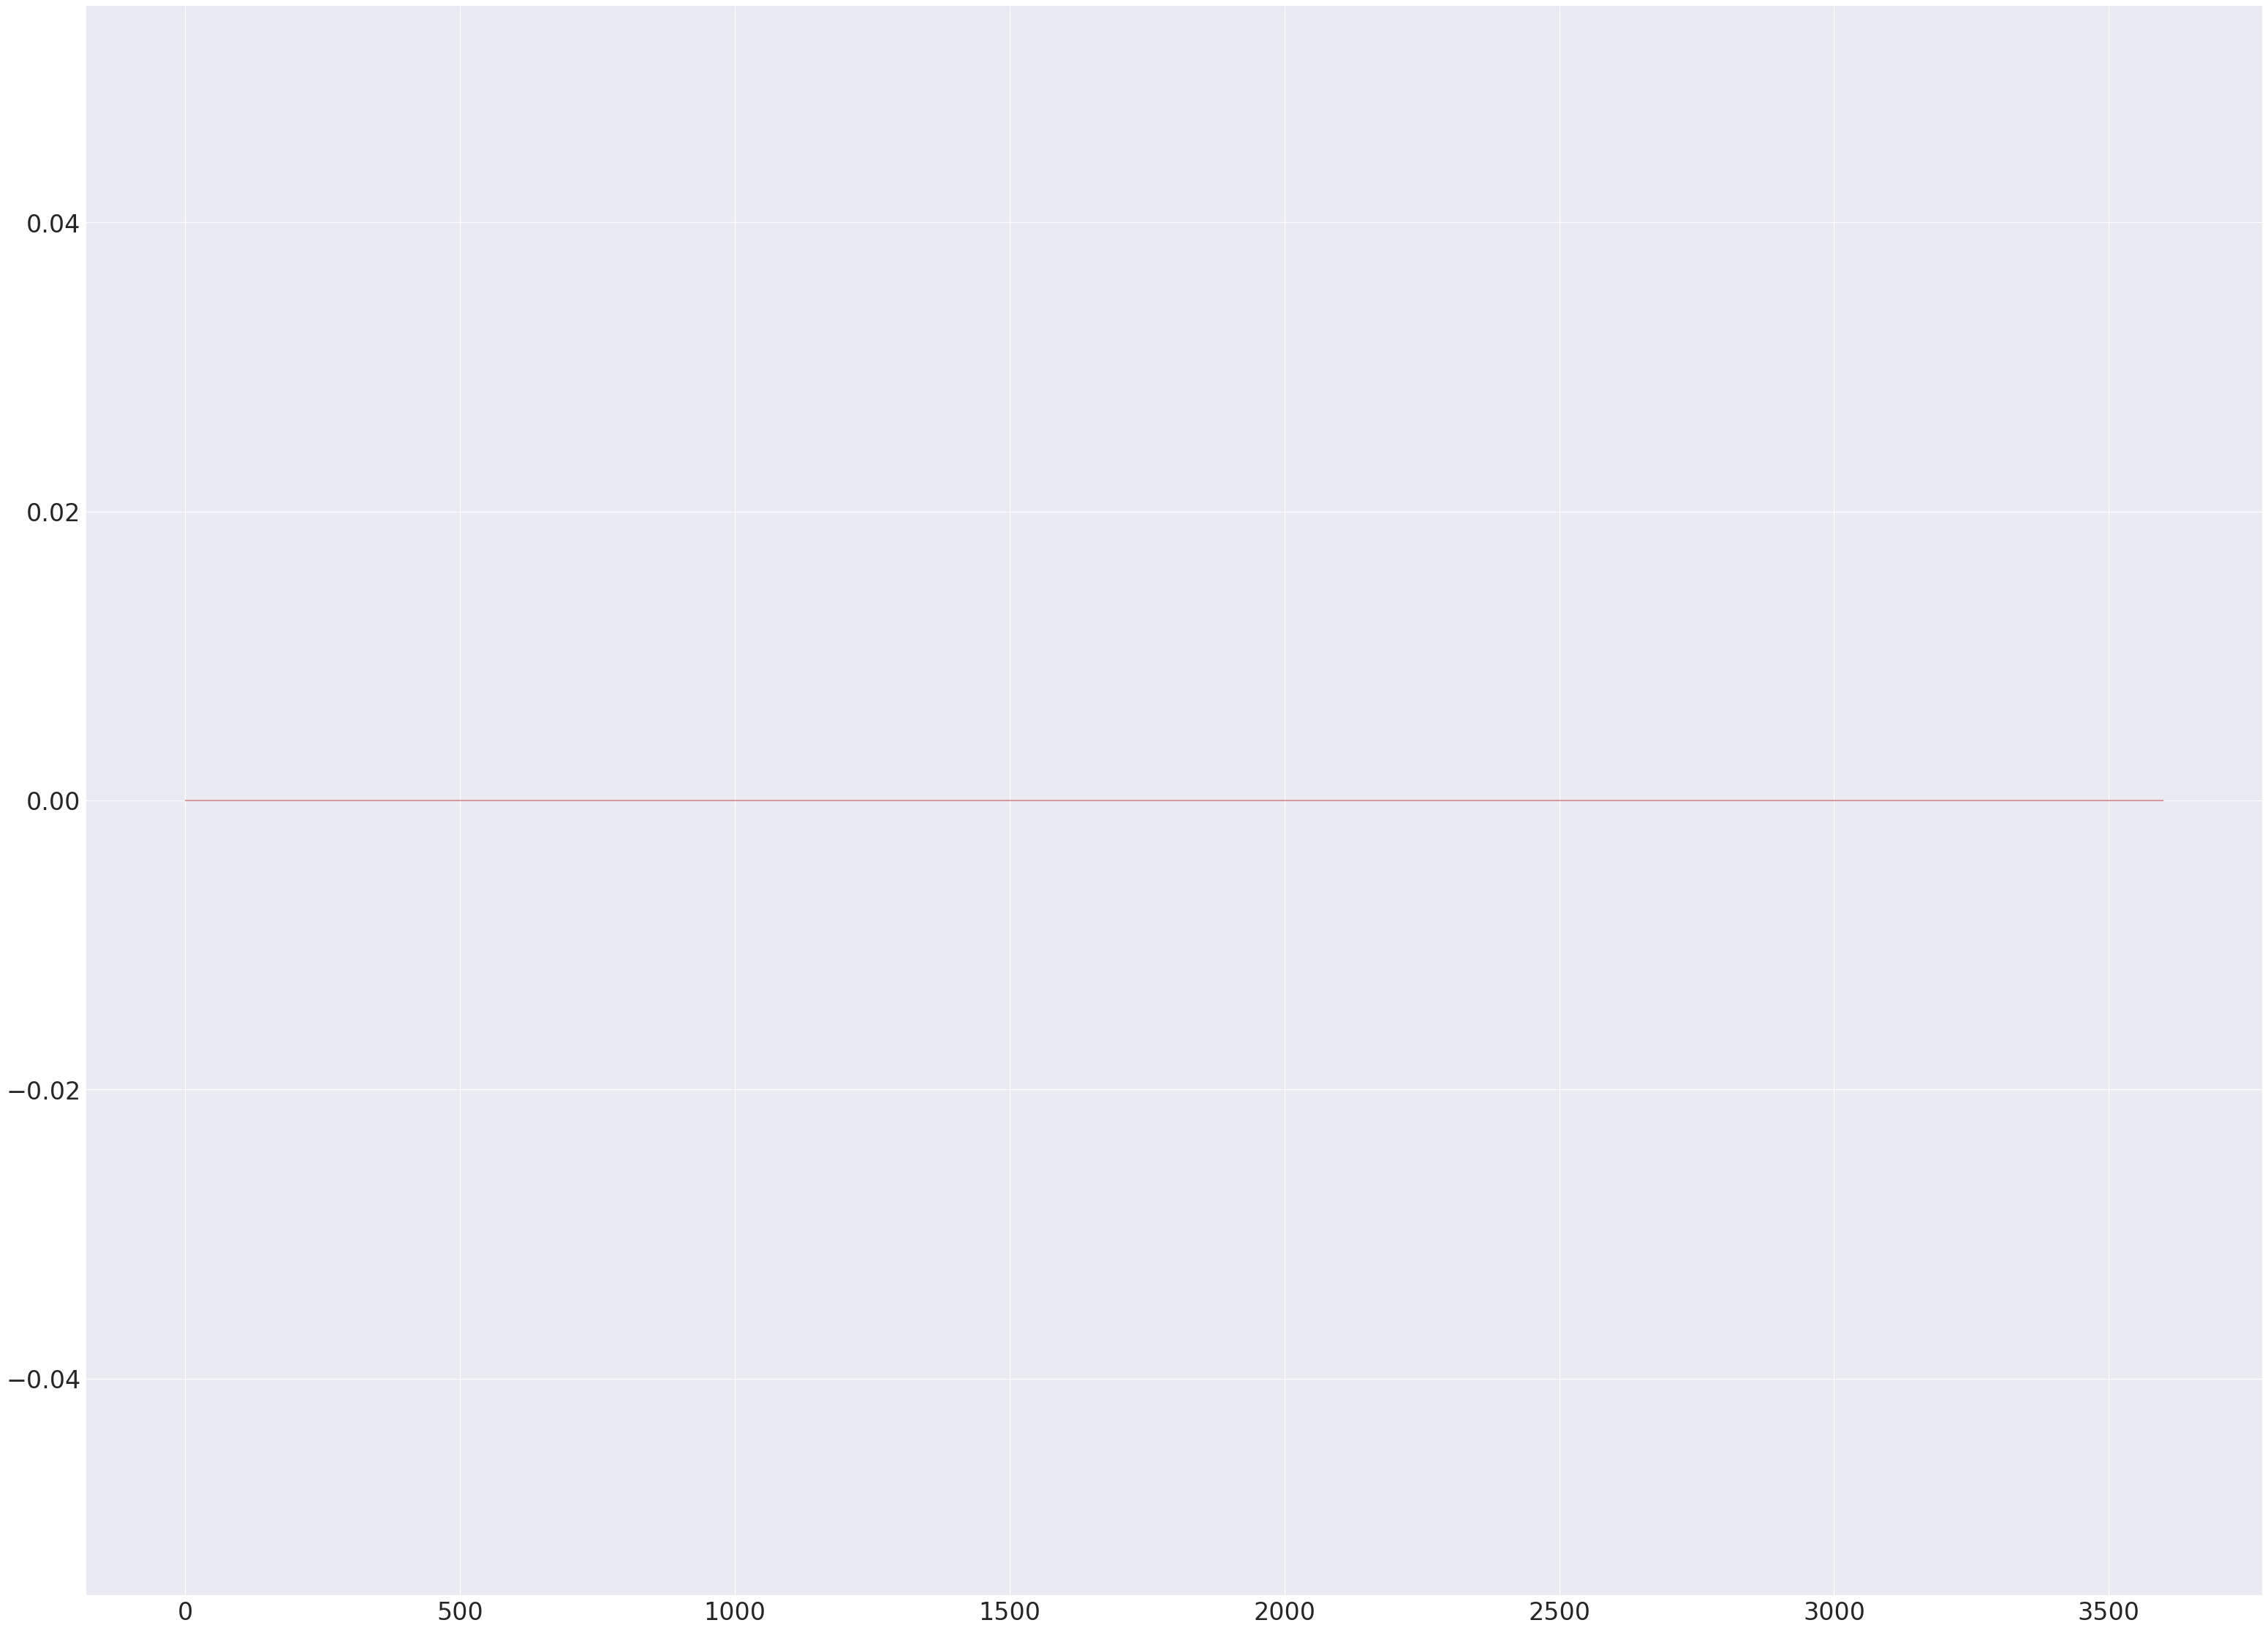

In [22]:

# Capture 4096 Traces
#fobosAcq.print_dma_status()
#traces = fobosAcq.captureFixedTraces(1)
traces = []

traces = fobosAcq.captureContinuous(1, mean=False)
#if len(traces) != 1:
 #   print("failed to capture appropriate number of traces %d vs. %d" % (len(traces), 4096) )
# Verify that no loss occurred when testing with binary counter
#fobosAcq.verifyContinuous(traces)
fobosAcq.plotTraces(traces)


In [16]:
len(traces)
print(hex(traces[2]))

0x1f8


In [24]:
import matplotlib.pyplot as plt